In [1]:
BASE_PATH = "D:/downloads"
hair_images =['ISIC_0078712','ISIC_0080817','ISIC_0082348','ISIC_0109869','ISIC_0155012','ISIC_0159568','ISIC_0164145','ISIC_0194550','ISIC_0194914','ISIC_0202023']
without_hair_images = ['ISIC_0015719','ISIC_0074268','ISIC_0075914','ISIC_0084395','ISIC_0085718','ISIC_0081956']

[]

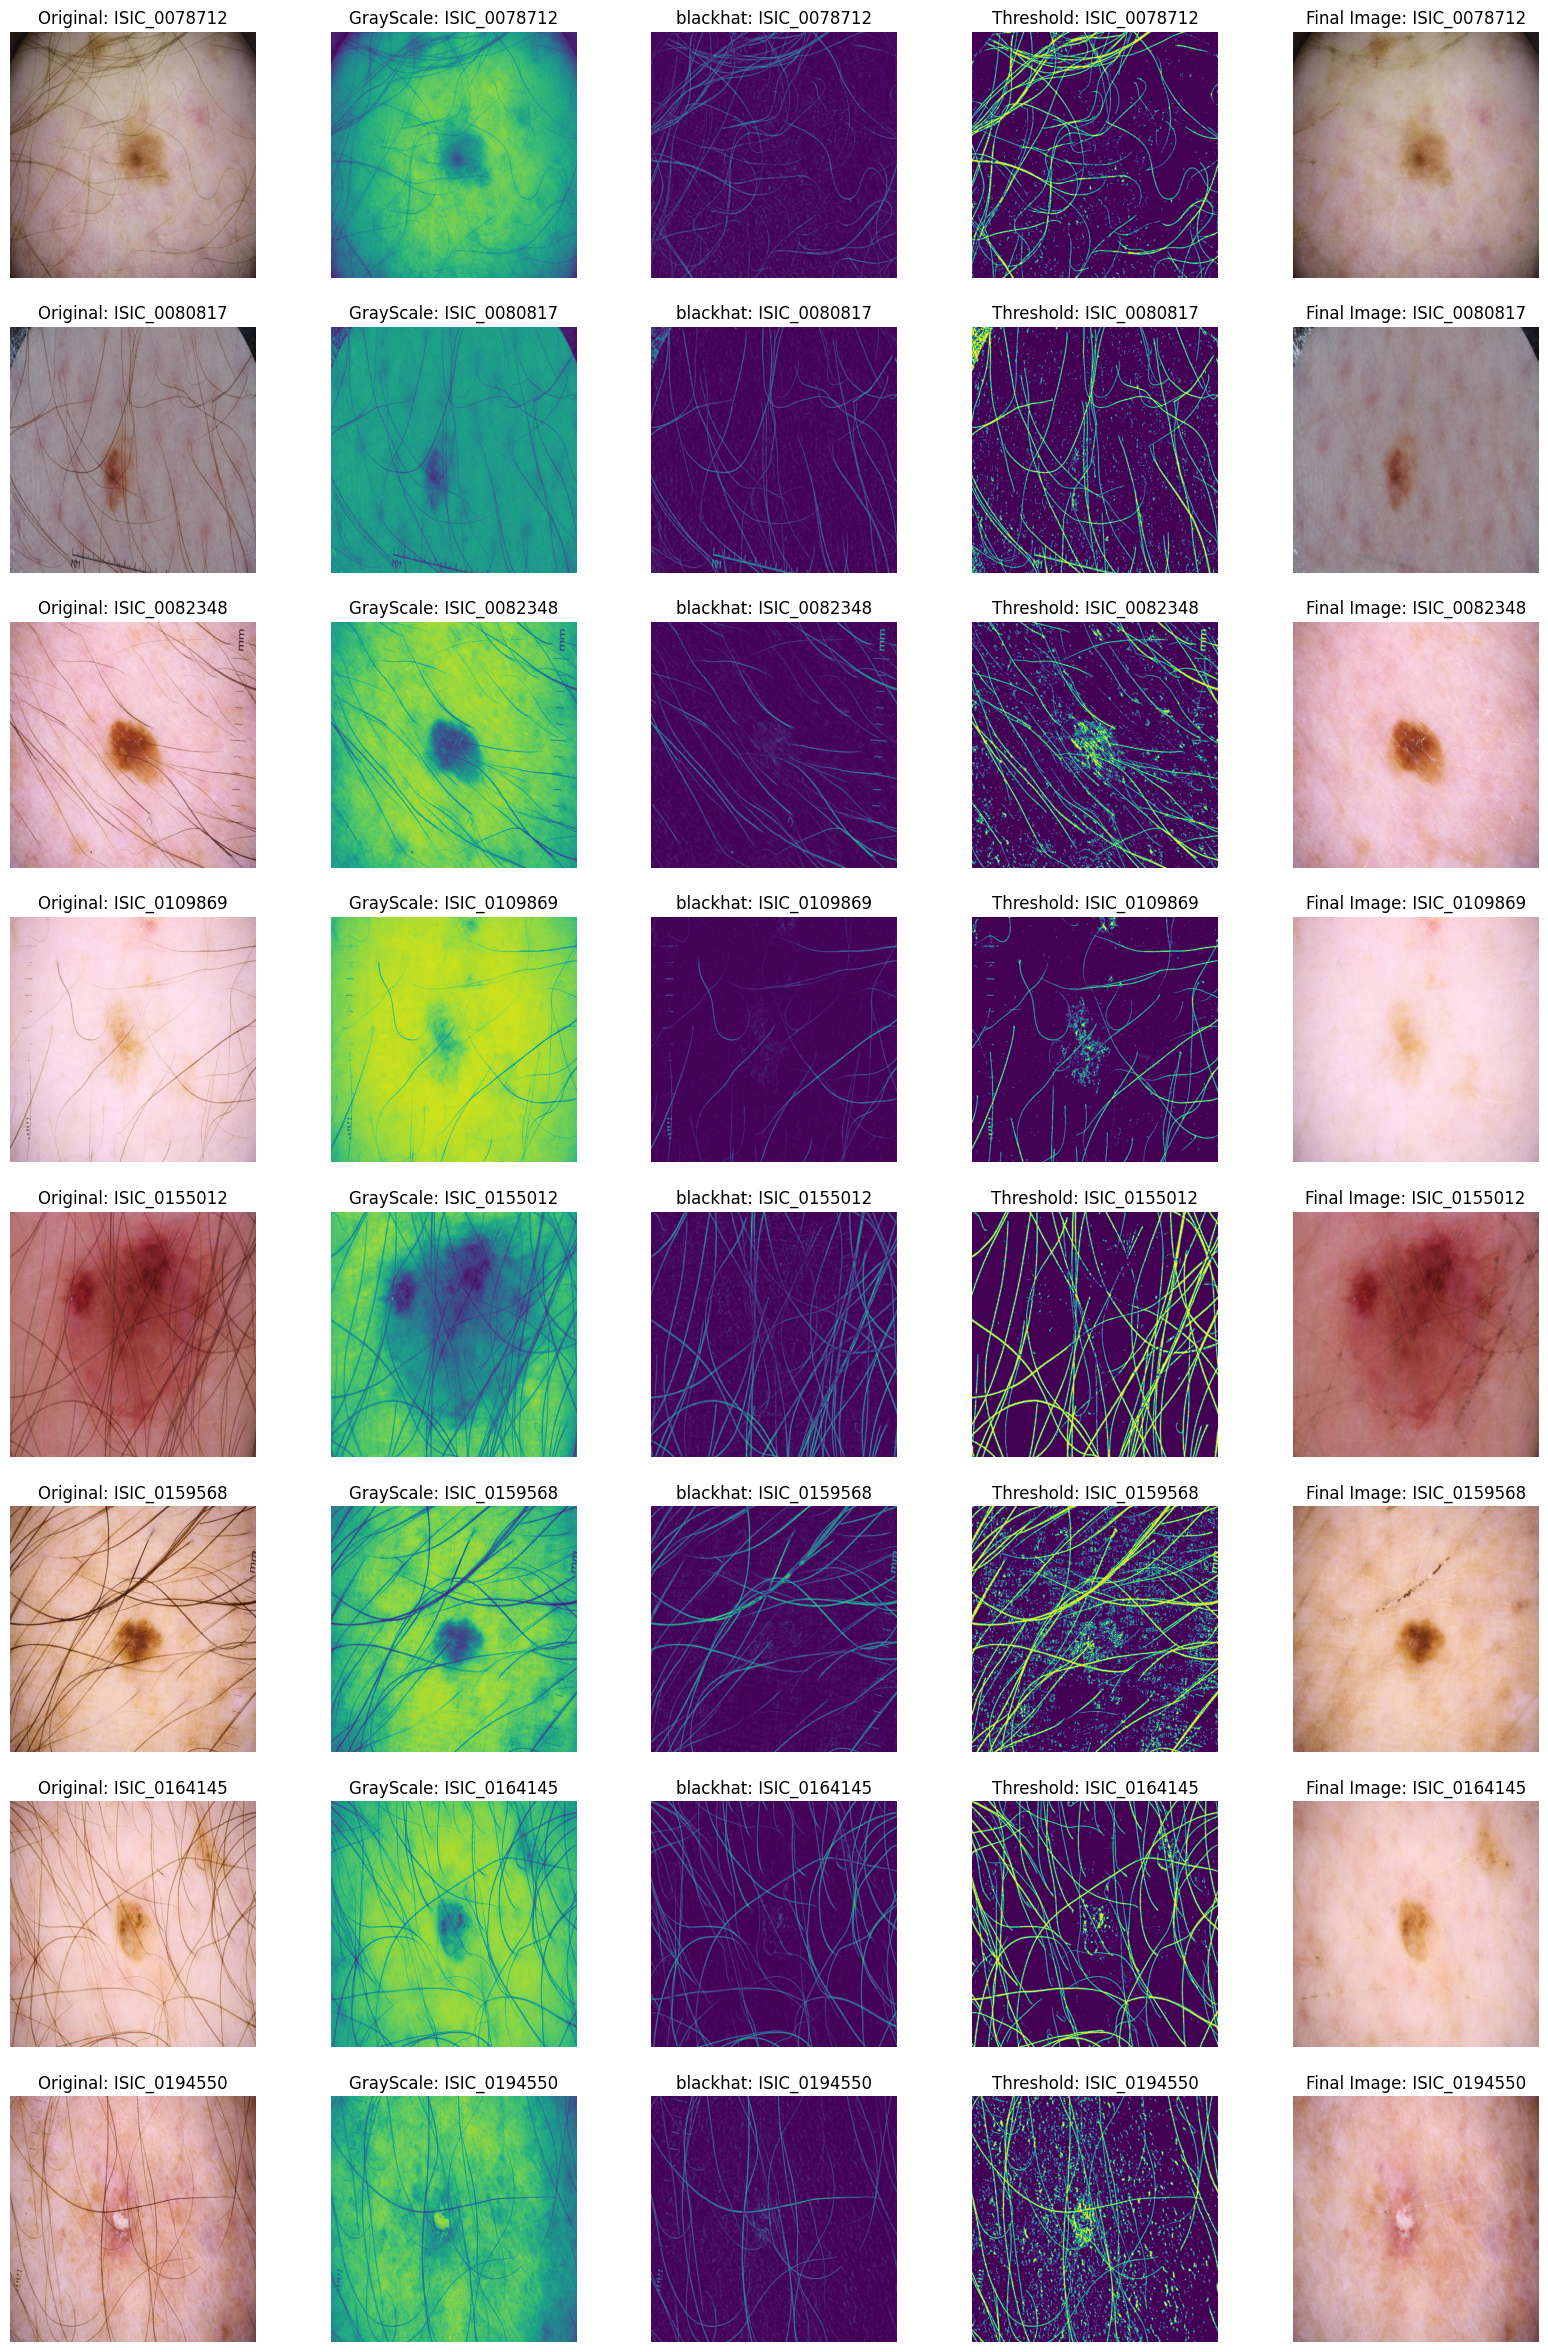

In [5]:
l = len(hair_images[:8])


fig = plt.figure(figsize = (20,30))


for i,image_name in enumerate(hair_images[:8]):
    image =cv2.imread(BASE_PATH + '/jpeg/train/' + image_name +'.jpg')
    image_resize = cv2.resize(image, (1024,1024))
    plt.subplot(l, 5, (i*5)+1)
    
    #Convert original image to RGB
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Original: "+ image_name)
    
    #convert image to grayscale
    grayScale = cv2.cvtColor(image_resize,cv2.COLOR_RGB2GRAY)
    plt.subplot(l,5,(i*5)+2)
    plt.imshow(grayScale)
    plt.axis("off")
    plt.title("GrayScale: " + image_name)
    
    #kernel for morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))
    
    #perform blackhat filtering on the grayscale image to find hair contours
    blackhat = cv2.morphologyEx(grayScale,cv2.MORPH_BLACKHAT,kernel)
    plt.subplot(l,5, (i*5)+ 3)
    plt.imshow(blackhat)
    plt.axis("off")
    plt.title("blackhat: " + image_name)
    
    
    #intensify the hair contours in preparation for the inpainting
    ret, threshold = cv2.threshold(blackhat, 10,255, cv2.THRESH_BINARY)
    plt.subplot(l,5,(i*5) + 4)
    plt.imshow(threshold)
    plt.axis("off")
    plt.title("Threshold: " + image_name)
    
    #inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold, 1, cv2.INPAINT_TELEA)
    plt.subplot(l,5, (i*5) +5)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis("off")
    plt.title("Final Image: " + image_name)
    

plt.plot()

In [6]:
def hair_remove(image):
    #convert image to greyscale
    grayScale = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
    #kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    #apply MORPH_Blackhat to grayscale image
    blackhat = cv2.morphologyEx(grayScale,cv2.MORPH_BLACKHAT,kernel)
    #apply thresholding to blackhat
    _, threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    #inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    
    return final_image
    

In [7]:
#Select a small sample of the .jpeg image paths
# we select some hairy photos on purpose
train_df = pd.read_csv("D:/downloads/" + "/train.csv")
train_df


image_name  patient_id     sex  age_approx  \
0      ISIC_2637011  IP_7279968    male        45.0   
1      ISIC_0015719  IP_3075186  female        45.0   
2      ISIC_0052212  IP_2842074  female        50.0   
3      ISIC_0068279  IP_6890425  female        45.0   
4      ISIC_0074268  IP_8723313  female        55.0   
...             ...         ...     ...         ...   
33121  ISIC_9999134  IP_6526534    male        50.0   
33122  ISIC_9999320  IP_3650745    male        65.0   
33123  ISIC_9999515  IP_2026598    male        20.0   
33124  ISIC_9999666  IP_7702038    male        50.0   
33125  ISIC_9999806  IP_0046310    male        45.0   

      anatom_site_general_challenge diagnosis benign_malignant  target  
0                         head/neck   unknown           benign       0  
1                   upper extremity   unknown           benign       0  
2                   lower extremity     nevus           benign       0  
3                         head/neck   unknown           benign       0  
4                   upper extremity   unknown           benign       0  
...                             ...       ...              ...     ...  
33121                         torso   unknown           benign       0  
33122                         torso   unknown           benign       0  
33123               lower extremity   unknown           benign       0  
33124               lower extremity   unknown           benign       0  
33125                         torso     nevus           benign       0  

[33126 rows x 8 columns]

In [8]:
#Select a small sample of the .jpeg image paths
# we select some hairy photos on purpose
hairy_photos = train_df.reset_index().iloc[[22, 25,31, 44, 68, 69]]

In [9]:
hairy_photos

index    image_name  patient_id   sex  age_approx  \
22     22  ISIC_0082348  IP_7684360  male        55.0   
25     25  ISIC_0083035  IP_5805281  male        50.0   
31     31  ISIC_0085902  IP_3658607  male        45.0   
44     44  ISIC_0091016  IP_4042098  male        40.0   
68     68  ISIC_0109568  IP_0825081  male        80.0   
69     69  ISIC_0109703  IP_8663649  male        45.0   

   anatom_site_general_challenge diagnosis benign_malignant  target  
22                         torso   unknown           benign       0  
25                         torso   unknown           benign       0  
31                         torso   unknown           benign       0  
44                         torso     nevus           benign       0  
68               lower extremity   unknown           benign       0  
69               upper extremity   unknown           benign       0

In [10]:
image_list = [
'D:/downloads/jpeg/train/ISIC_0082348.jpg', 
'D:/downloads/jpeg/train/ISIC_0083035.jpg', 
'D:/downloads/jpeg/train/ISIC_0085902.jpg', 
'D:/downloads/jpeg/train/ISIC_0091016.jpg',
'D:/downloads/jpeg/train/ISIC_0109568.jpg', 
'D:/downloads/jpeg/train/ISIC_0109703.jpg',
'D:/downloads/jpeg/train/ISIC_0085718.jpg'
]
image_list


['D:/downloads/jpeg/train/ISIC_0082348.jpg',
 'D:/downloads/jpeg/train/ISIC_0083035.jpg',
 'D:/downloads/jpeg/train/ISIC_0085902.jpg',
 'D:/downloads/jpeg/train/ISIC_0091016.jpg',
 'D:/downloads/jpeg/train/ISIC_0109568.jpg',
 'D:/downloads/jpeg/train/ISIC_0109703.jpg',
 'D:/downloads/jpeg/train/ISIC_0085718.jpg']

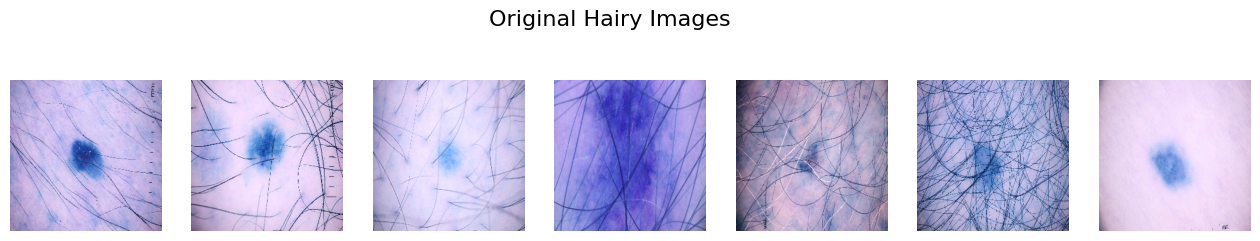

In [12]:
#show the augmented images
plt.figure(figsize =(16,3))
plt.suptitle("Original Hairy Images" , fontsize = 16)



for i in range(7):
    image = cv2.imread(image_list[i])
    image = cv2.resize(cv2.imread(image_list[i]), (256 , 256 )).reshape((256,256,3))
    
    plt.subplot(1,7, i+1)
    plt.imshow(image)
    plt.axis("off")

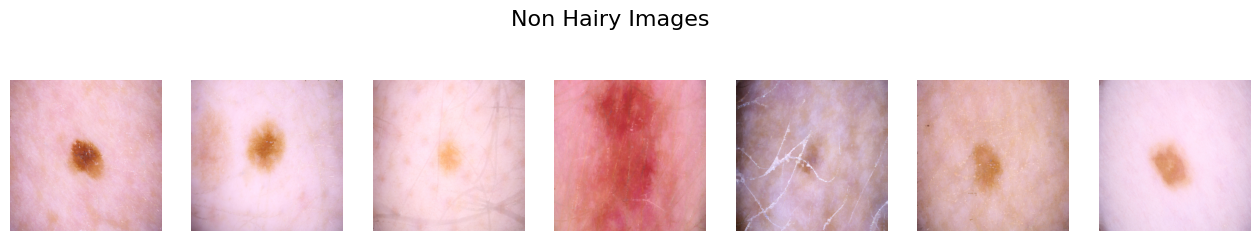

In [14]:
#show the sample
plt.figure(figsize =(16,3))
plt.suptitle("Non Hairy Images" , fontsize = 16)

for k,path in enumerate(image_list):
    image = mpimg.imread(path)
    image = cv2.resize(image, (300,300))
    image = hair_remove(image)
    
    plt.subplot(1,7, k+1)
    plt.imshow(image)
    plt.axis("off")

In [4]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd